In [140]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [141]:
df=pd.read_csv("AirQualityUCI.csv",delimiter=";", decimal=",",
                usecols=[i for i in range(15)],
                parse_dates={"date_time":[0,1]},
                index_col="date_time",
                na_values="-200")
df.index=pd.to_datetime(df.index,format="%d/%m/%Y %H.%M.%S",errors="coerce")
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
date_time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [142]:
#wygląda na to, że jest dużo pustch wierszy zawierających same separatory
#mozemy chciec usunac kolumne nhmc poniewaz zawiera tylko 914 nie pustych wartosci
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1.0 MB


In [143]:
#usuniecie wierszy w ktorych sa same puste wartosci
df.dropna(how="all",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9326 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1020.0 KB


In [144]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [145]:
df_daymean=df.groupby(df.index.date).mean()
df_daymean.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,2.239130,1244.166667,104.500000,7.979167,851.958333,144.391304,1277.250000,99.869565,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,2.804545,1281.666667,156.347826,12.129167,1008.291667,173.727273,1101.875000,116.272727,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,2.695652,1330.666667,139.250000,10.916667,992.833333,184.434783,993.208333,118.869565,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,2.469565,1361.125000,116.958333,9.637500,943.916667,146.608696,1001.291667,110.391304,1602.375000,1234.208333,16.012500,48.850000,0.849671


Text(0.5, 1.0, 'Średnia wartość RH w kolejnych dniach')

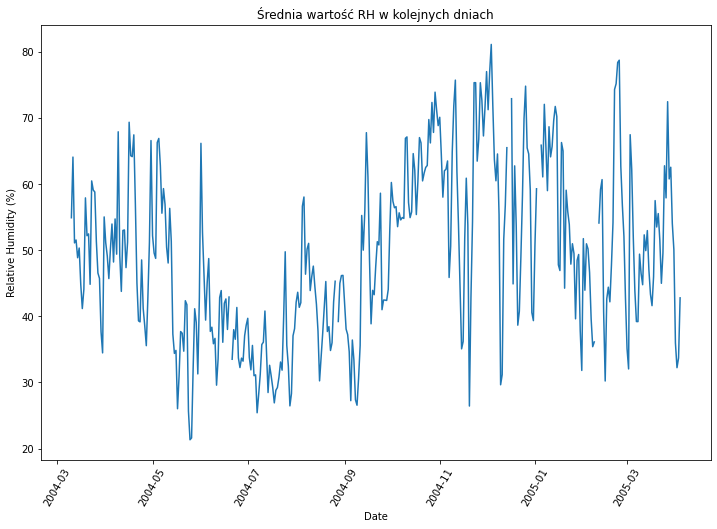

In [146]:
#2. Narysuj na wykresie średnią wartość wilgotności powietrza 
#(cecha RH - Relative Humidity (%)) w kolejnych dniach. Wyświetl tytuł wykresu i podpisz osie
plt.figure(figsize=(12,8))
plt.plot(df_daymean.index.to_numpy(),df_daymean["RH"])
plt.xticks(rotation=60)
plt.ylabel("Relative Humidity (%)")
plt.xlabel("Date")
plt.title("Średnia wartość RH w kolejnych dniach")

In [147]:
#punkt 3. Znajdź i wypełnij wartości puste cechy RH jej medianą
df["RH"].fillna(df["RH"].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9326 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             9326 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1020.0 KB


Text(0, 0.5, 'AH')

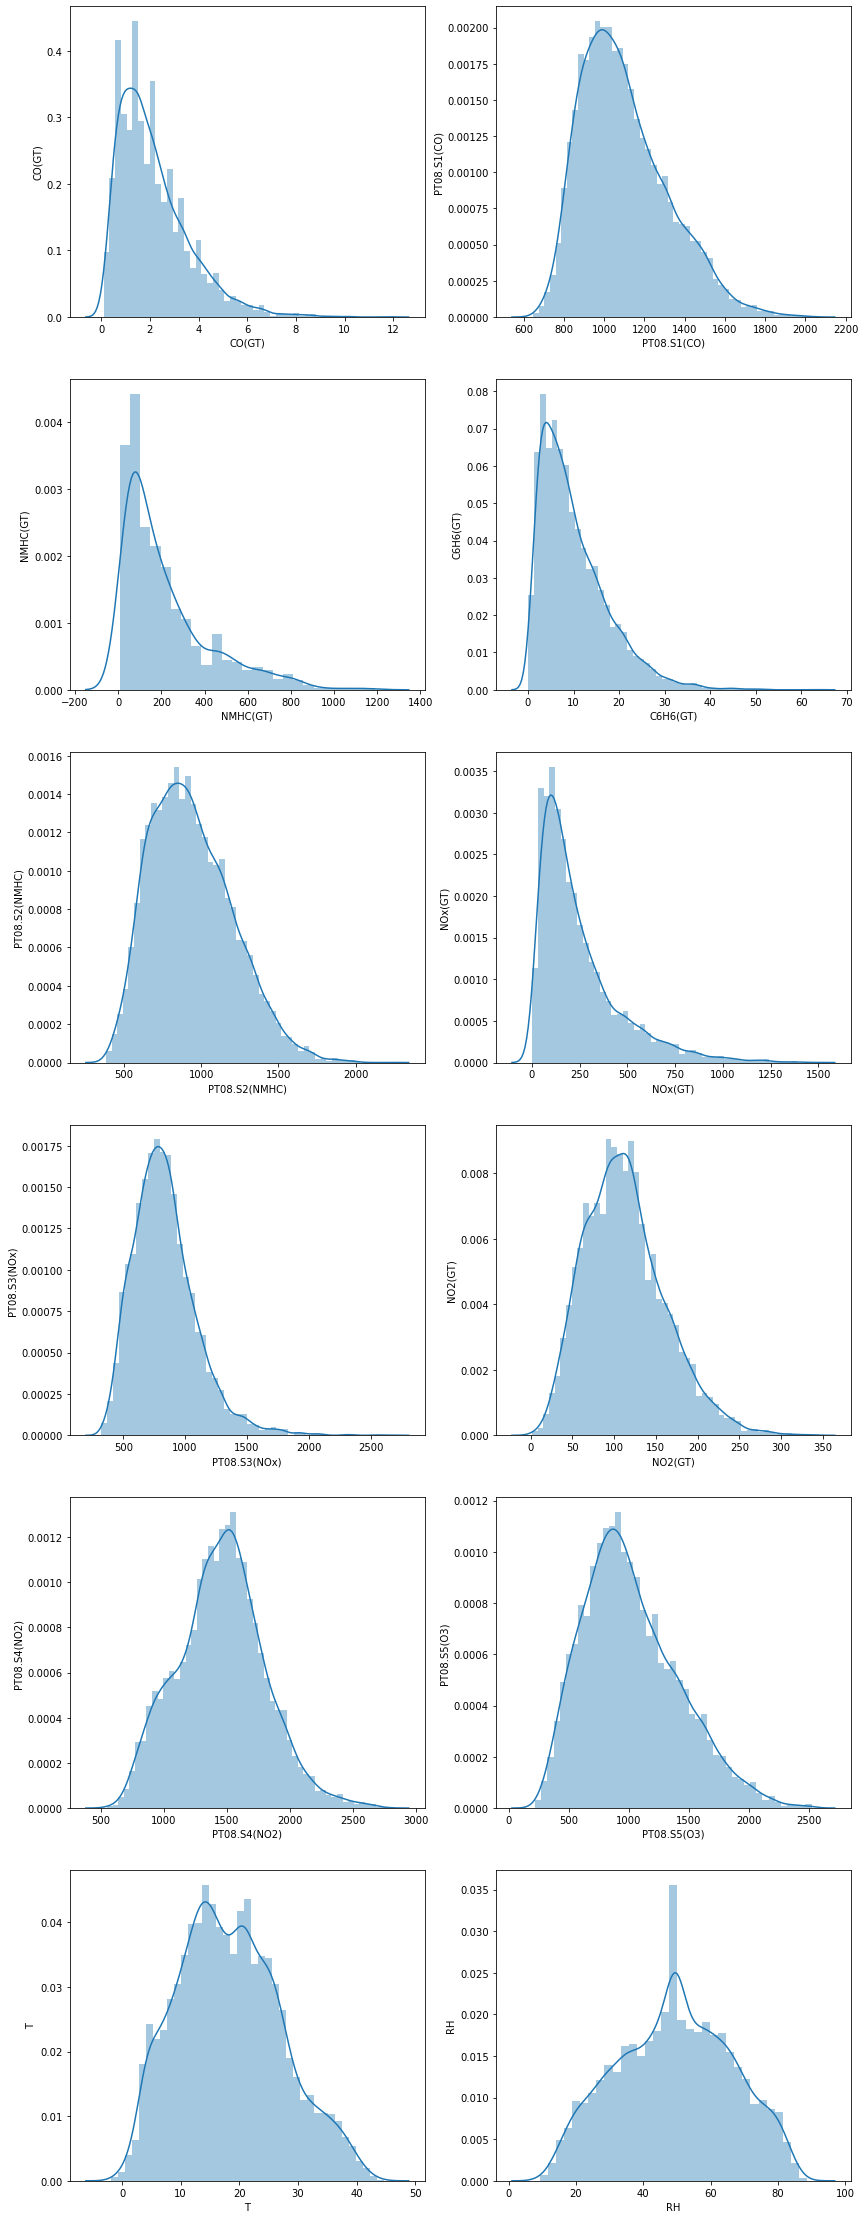

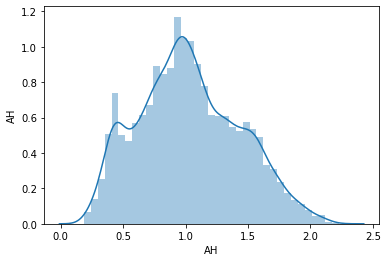

In [148]:
fig,axes=plt.subplots(6,2,figsize=(14,40))
for ax,col in zip(axes.ravel(),df.columns[:12]):
    sns.distplot(df[col],ax=ax)
    ax.set_ylabel(col)
plt.figure()
sns.distplot(df[df.columns[12]])
plt.ylabel(df.columns[12])

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'PT08.S1(CO)'),
  Text(1, 0, 'NMHC(GT)'),
  Text(2, 0, 'PT08.S2(NMHC)'),
  Text(3, 0, 'NOx(GT)'),
  Text(4, 0, 'PT08.S3(NOx)'),
  Text(5, 0, 'NO2(GT)'),
  Text(6, 0, 'PT08.S4(NO2)'),
  Text(7, 0, 'PT08.S5(O3)')])

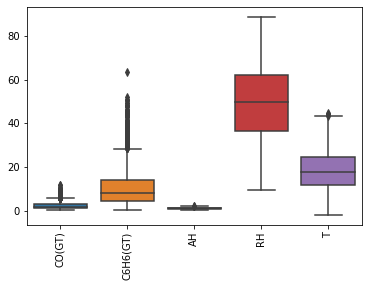

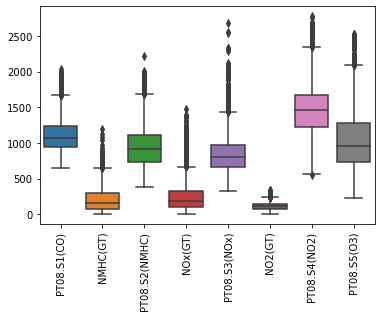

In [149]:
sns.boxplot(data=df[df.columns[[0,3,12,11,10]]])
plt.xticks(rotation=90)
plt.figure()
sns.boxplot(data=df[df.columns[list(set(range(13))-set([0,3,12,11,10]))]])
plt.xticks(rotation=90)

In [150]:
#wygląda na to że isolationforest nie dziala zbyt dobrze na samym rh
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
rh_scaled=scaler.fit_transform(df["RH"].to_numpy().reshape(-1,1))

isf=IsolationForest(n_estimators=200,random_state=42,n_jobs=-1)
predictions=isf.fit_predict(rh_scaled)
print(sum(predictions==-1))

3482


In [151]:
#DBSCAN też dobrze nie działa na 1 feature
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=10)
predictions=dbscan.fit_predict(rh_scaled)
print(sum(predictions==-1))

0


In [152]:
#metoda z-score nie znajduje outlierow
def zscore_outliers(data_numpy):
    data_std=data_numpy.std()
    data_mean=data_numpy.mean()
    cut_off=data_std*2.5
    lower_limit=data_mean-cut_off
    upper_limit=data_mean+cut_off
    outliers=(data_numpy<lower_limit) + (data_numpy>upper_limit)
    return outliers

outliers=zscore_outliers(rh_scaled)
sum(outliers)

array([0])

In [153]:
#metoda iqr nie znalazlo żadnych wartosci odstajacych
def iqr_outliers(data):
    q1=np.quantile(data,0.25)
    q3=np.quantile(data,0.75)
    iqr=q3-q1
    lower_tail=q1-1.5*iqr
    upper_tail=q3+1.5*iqr
    outliers=(data<lower_tail) + (data>upper_tail)
    return outliers
outliers=iqr_outliers(rh_scaled)
sum(outliers)

array([0])

In [154]:
#4. Znajdź wartości odstające (outliery) zmiennej RH. 
#Dodaj nową kolumnę "outlier" przyjmującą wartości True/False w zależności od tego czy 
#wartość została zidentyfikowana jako outlier.

#dodanie kolumny z outlierami kolumny RH
df["outliers"]=outliers

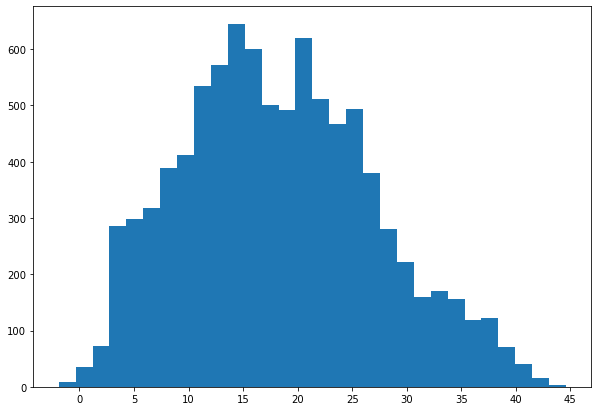

In [155]:
"""
wnioski: większość wartości wypada w zakresie 2-35 stopni, 
bardzo malo pomiarów poniżej 0 stopni oraz powyżej 40 stopni
najczęściej występujące wartości są w przedziale ok. 11-27 stopni co jest dosyc sporym zakresem
rozkład mało przypomina rozkład normalny
zamiana wartości pustych na medianę mogła trochę zmienić histogram ponieważ było 400+ NA values
"""
plt.figure(figsize=(10,7))
plt.hist(df["T"],bins=30)
plt.locator_params(axis="x", nbins=20)

<AxesSubplot:xlabel='T', ylabel='Density'>

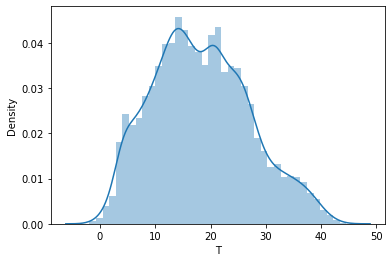

In [156]:
sns.distplot(df["T"])

CO(GT)           0.047753
PT08.S1(CO)      0.114606
NMHC(GT)        -0.190605
C6H6(GT)        -0.061681
PT08.S2(NMHC)   -0.090380
NOx(GT)          0.210616
PT08.S3(NOx)    -0.056740
NO2(GT)         -0.087541
PT08.S4(NO2)    -0.032188
PT08.S5(O3)      0.124956
T               -0.578621
RH               1.000000
AH               0.167971
outliers              NaN
Name: RH, dtype: float64


<AxesSubplot:>

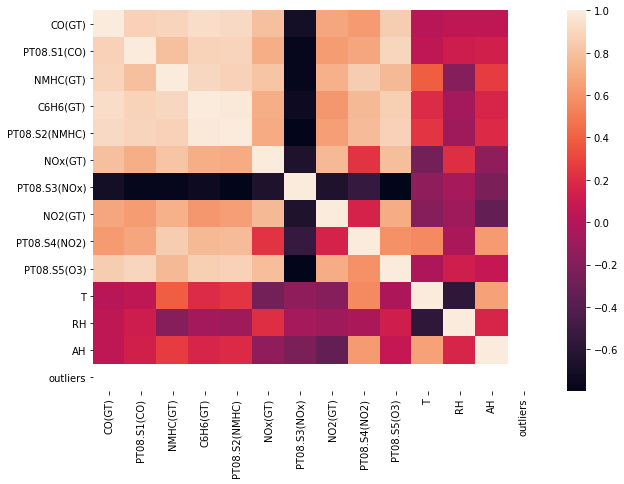

In [157]:
"""
6. Zbadaj korelację cechy RH i T. 
Przedstaw wyniki z wykorzystaniem macierzy korelacji. Napisz krótnie wnioski
"""
plt.figure(figsize=(10,7))
corr=df.corr()
print(corr["RH"])
sns.heatmap(corr)

In [158]:
#wilgotność jest mocno odwrotnie skorelowana z temperaturą
# kiedy rośnie temperatura to maleje wilgotność
corr["RH"]["T"]

-0.5786208353974104

In [160]:
import os
os.system('jupyter nbconvert --to html florekdaniel_prosta_analiza_danych.ipynb')

0